<a href="https://colab.research.google.com/github/mohmedelsakaty/Supply-Chain-Analysis-End-to-End/blob/main/PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import os
import pandas as pd

# 1. Check if the file exists in /content
print("Files in /content:", os.listdir("/content"))

# 2. Try loading the CSV
try:
    df = pd.read_csv("/content/data after sql.csv", parse_dates=["OrderDate"]).drop_duplicates()
    print("✅ File connected successfully!")

    # 3. Show first 5 rows to confirm data
    print(df.head())
except FileNotFoundError:
    print("❌ File not found. Make sure you uploaded it or mounted Google Drive.")

Files in /content: ['.config', 'data after sql.csv', '.ipynb_checkpoints', 'sample_data']
✅ File connected successfully!
    OrderID  OrderDate        Supplier       SKU    ProductName  Quantity  \
0  ORD10054 2025-01-02    Atlas Supply  SKU-1032  Steering Rack       147   
1  ORD10085 2025-01-09   TransAuto Ltd  SKU-1016        Bearing       385   
2  ORD10044 2025-01-14    Atlas Supply  SKU-1031      Brake Pad       355   
3  ORD10081 2025-01-15  Delta Parts Co  SKU-1019  Steering Rack        89   
4  ORD10038 2025-01-21   TransAuto Ltd  SKU-1001           Axle       262   

   UnitCost  UnitPrice CountryFrom CountryTo  ... LeadTimeDays  \
0    201.80     289.50       Italy     Egypt  ...           30   
1     76.80     113.60       Italy     Egypt  ...           19   
2     83.20     101.30       Italy     Egypt  ...           10   
3    237.90     293.20       Egypt     Egypt  ...           30   
4     22.00      27.40       Italy     Egypt  ...           45   

   TransitTimeDays 

In [36]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          100 non-null    object        
 1   OrderDate        100 non-null    datetime64[ns]
 2   Supplier         100 non-null    object        
 3   SKU              100 non-null    object        
 4   ProductName      100 non-null    object        
 5   Quantity         100 non-null    int64         
 6   UnitCost         100 non-null    float64       
 7   UnitPrice        100 non-null    float64       
 8   CountryFrom      100 non-null    object        
 9   CountryTo        100 non-null    object        
 10  ShippingMethod   100 non-null    object        
 11  LeadTimeDays     100 non-null    int64         
 12  TransitTimeDays  100 non-null    int64         
 13  OnTimeDelivery   100 non-null    object        
 14  DefectRate       100 non-null    float64       


In [37]:

df["OnTimeDelivery"] = df["OnTimeDelivery"].str.upper().str.strip()


df["LateFlag"] = df["OnTimeDelivery"].map({"Y": 0, "N": 1})


df[["OnTimeDelivery", "LateFlag"]].head()


,OnTimeDelivery,LateFlag
0,Y,0
1,Y,0
2,Y,0
3,Y,0
4,Y,0


In [38]:
print(df.columns)

Index(['OrderID', 'OrderDate', 'Supplier', 'SKU', 'ProductName', 'Quantity',
       'UnitCost', 'UnitPrice', 'CountryFrom', 'CountryTo', 'ShippingMethod',
       'LeadTimeDays', 'TransitTimeDays', 'OnTimeDelivery', 'DefectRate',
       'Warehouse', 'TotalCost', 'Revenue', 'GrossMarginPct', 'IdleTime',
       'Profit', 'LateFlag'],
      dtype='object')


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          100 non-null    object        
 1   OrderDate        100 non-null    datetime64[ns]
 2   Supplier         100 non-null    object        
 3   SKU              100 non-null    object        
 4   ProductName      100 non-null    object        
 5   Quantity         100 non-null    int64         
 6   UnitCost         100 non-null    float64       
 7   UnitPrice        100 non-null    float64       
 8   CountryFrom      100 non-null    object        
 9   CountryTo        100 non-null    object        
 10  ShippingMethod   100 non-null    object        
 11  LeadTimeDays     100 non-null    int64         
 12  TransitTimeDays  100 non-null    int64         
 13  OnTimeDelivery   100 non-null    object        
 14  DefectRate       100 non-null    float64       


In [40]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          100 non-null    object        
 1   OrderDate        100 non-null    datetime64[ns]
 2   Supplier         100 non-null    object        
 3   SKU              100 non-null    object        
 4   ProductName      100 non-null    object        
 5   Quantity         100 non-null    int64         
 6   UnitCost         100 non-null    float64       
 7   UnitPrice        100 non-null    float64       
 8   CountryFrom      100 non-null    object        
 9   CountryTo        100 non-null    object        
 10  ShippingMethod   100 non-null    object        
 11  LeadTimeDays     100 non-null    int64         
 12  TransitTimeDays  100 non-null    int64         
 13  OnTimeDelivery   100 non-null    object        
 14  DefectRate       100 non-null    float64       


In [41]:
  # 0) تنظيف أسماء الأعمدة (مهم)
  df.columns = df.columns.str.strip()

  # 1) سيناريو تقليل UnitCost 5%
  df["UnitCost_5pct_down"] = df["UnitCost"] * 0.95

  # 2) حساب الربح الجديد (order-level)
  df["Profit_5pct_down"] = (
      df["UnitPrice"] - df["UnitCost_5pct_down"]
  ) * df["Quantity"]

  # 3) تجميع على مستوى المورد (Supplier-level)
  supplier_profit = (
      df.groupby("Supplier", as_index=False)
        .agg(
            Profit_Before=("Profit", "sum"),
            Profit_After=("Profit_5pct_down", "sum")
        )
  )

  # 4) حساب نسبة التغير في الربح (% ومقربة لرقمين)
  supplier_profit["Profit_Change_Pct"] = (
      (supplier_profit["Profit_After"] - supplier_profit["Profit_Before"])
      / supplier_profit["Profit_Before"] * 100
  ).round(2).astype(str) + "%"
  pd.options.display.float_format = '{:,.2f}'.format


  # 5) عرض الجدول
  supplier_profit


,Supplier,Profit_Before,Profit_After,Profit_Change_Pct
0,Atlas Supply,272401,"312,977.20",14.9%
1,Delta Parts Co,137222,"157,885.87",15.06%
2,Nile Components,220318,"256,360.90",16.36%
3,TransAuto Ltd,162098,"186,778.00",15.23%
4,Zenith Logistics,175819,"200,491.37",14.03%


In [42]:
df["Profit_from_units"] = (df["UnitPrice"] - df["UnitCost"]) * df["Quantity"]
df["Profit_diff"] = df["Profit"] - df["Profit_from_units"]

df[["Profit", "Profit_from_units", "Profit_diff"]].head()


,Profit,Profit_from_units,Profit_diff
0,12878,"12,891.90",-13.90
1,14160,"14,168.00",-8.00
2,6439,"6,425.50",13.50
3,4918,"4,921.70",-3.70
4,1406,"1,414.80",-8.80


In [43]:

# 1) Lead time after 5% reduction
df["LeadTime_5pct_down"] = df["LeadTimeDays"] * 0.95

# 2) Assume idle time reduces proportionally
df["IdleTime_5pct_down"] = df["IdleTime"] * 0.95

# 3) Assume idle time cost impact (simple proxy)
idle_cost_per_day = df["TotalCost"].mean() / df["LeadTimeDays"].mean()

df["TotalCost_5pct_down_LT"] = (
    df["TotalCost"] - (df["IdleTime"] - df["IdleTime_5pct_down"]) * idle_cost_per_day
)

# 4) New profit after lead time improvement
df["Profit_5pct_down_LT"] = df["Revenue"] - df["TotalCost_5pct_down_LT"]

# 5) Impact
df["Profit_Change_LT"] = df["Profit_5pct_down_LT"] - df["Profit"]

df[[
    "Profit",
    "Profit_5pct_down_LT",
    "Profit_Change_LT"
]].head()


,Profit,Profit_5pct_down_LT,Profit_Change_LT
0,12878,"13,153.84",275.84
1,14160,"14,252.05",92.05
2,6439,"6,531.55",92.55
3,4918,"5,055.72",137.72
4,1406,"1,498.65",92.65


In [44]:
method_financials = (
    df.groupby("ShippingMethod", as_index=False)
      .agg(
          Total_Revenue=("Revenue", "sum"),
          Total_Cost=("TotalCost", "sum"),
          Total_Profit=("Profit", "sum"),
          Total_Volume=("Quantity", "sum")
      )
      .sort_values("Total_Revenue", ascending=False)
)

method_financials


,ShippingMethod,Total_Revenue,Total_Cost,Total_Profit,Total_Volume
3,Sea,"2,384,830.31","1,790,227.60",594580,14740
0,Air,"621,529.21","467,736.70",153787,3265
2,Road,"619,784.19","474,421.40",145355,4295
1,Courier,"274,915.21","200,774.60",74136,1789


In [45]:
df["Defect_Profit_Loss"] = df["Profit"] * df["DefectRate"]


In [46]:
import pandas as pd

# Load dataset (adjust path if needed)
df = pd.read_csv("/content/data after sql.csv", parse_dates=["OrderDate"]).drop_duplicates()

# Total revenue
total_revenue = df["Revenue"].sum()

# Group by ProductName and calculate totals
revenue_share = (
    df.groupby("ProductName", as_index=False)
      .agg({"Revenue": "sum", "Profit": "sum"})
)

# Add revenue percent column
revenue_share["RevenuePct"] = (revenue_share["Revenue"] / total_revenue * 100).round(2)

# Sort by highest revenue percent (good results first)
highest_revenue_products = revenue_share.sort_values("RevenuePct", ascending=False)

print(highest_revenue_products)

     ProductName    Revenue  Profit  RevenuePct
0     Alternator 956,418.50  262011       24.52
2        Bearing 546,255.50  127469       14.00
4      Fuel Pump 543,365.91  132652       13.93
3      Brake Pad 537,407.61  148037       13.78
1           Axle 467,804.10  113106       11.99
6       Radiator 426,602.69   90513       10.94
5        Gearbox 282,711.90   59876        7.25
7  Steering Rack 140,492.70   34194        3.60


Shipping Method Risk Analysis:
  ShippingMethod  DefectRate  OnTimeDeliveryBinary  OnTimeDeliveryRatePct
0            Air        0.04                  1.00                 100.00
1        Courier        0.05                  1.00                 100.00
2           Road        0.05                  0.89                  88.89
3            Sea        0.04                  0.88                  88.14


/tmp/ipython-input-2191002199.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shipping_stats, x="ShippingMethod", y="DefectRate", palette="Reds")


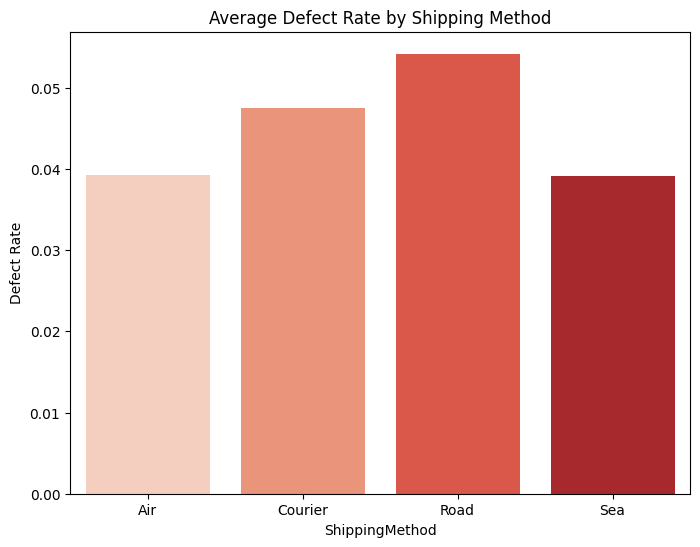

/tmp/ipython-input-2191002199.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shipping_stats, x="ShippingMethod", y="OnTimeDeliveryRatePct", palette="Blues")


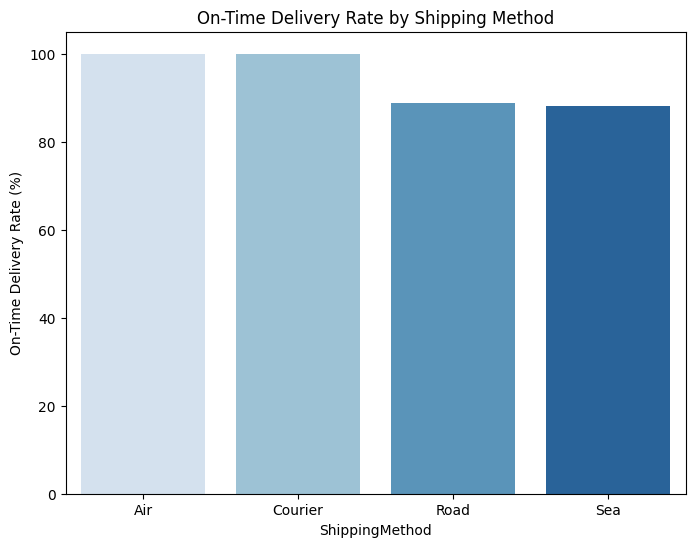

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data after sql.csv")

# Convert OnTimeDelivery (Y/N) into numbers: Y=1, N=0
df["OnTimeDeliveryBinary"] = df["OnTimeDelivery"].map({"Y":1, "N":0})

# Step 1: حساب متوسط نسبة العيوب ومتوسط الالتزام بالمواعيد لكل وسيلة شحن
shipping_stats = (
    df.groupby("ShippingMethod")
      .agg({"DefectRate":"mean", "OnTimeDeliveryBinary":"mean"})
      .reset_index()
)

# تحويل الالتزام بالمواعيد لنسبة مئوية
shipping_stats["OnTimeDeliveryRatePct"] = shipping_stats["OnTimeDeliveryBinary"] * 100

print("Shipping Method Risk Analysis:")
print(shipping_stats)

# Step 2: Visualization - مقارنة نسبة العيوب
plt.figure(figsize=(8,6))
sns.barplot(data=shipping_stats, x="ShippingMethod", y="DefectRate", palette="Reds")
plt.title("Average Defect Rate by Shipping Method")
plt.ylabel("Defect Rate")
plt.show()

# Step 3: Visualization - مقارنة الالتزام بالمواعيد
plt.figure(figsize=(8,6))
sns.barplot(data=shipping_stats, x="ShippingMethod", y="OnTimeDeliveryRatePct", palette="Blues")
plt.title("On-Time Delivery Rate by Shipping Method")
plt.ylabel("On-Time Delivery Rate (%)")
plt.show()

In [48]:
method_financials[['ShippingMethod', 'Total_Revenue', 'Total_Cost']]

,ShippingMethod,Total_Revenue,Total_Cost
3,Sea,"2,384,830.31","1,790,227.60"
0,Air,"621,529.21","467,736.70"
2,Road,"619,784.19","474,421.40"
1,Courier,"274,915.21","200,774.60"


/tmp/ipython-input-1452446450.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_stats = df.groupby("LeadTimeRange")["OnTimeDeliveryBinary"].mean().reset_index()
/tmp/ipython-input-1452446450.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=range_stats, x="LeadTimeRange", y="OnTimeDeliveryRatePct", palette="Blues")


On-Time Delivery Rate by Lead Time Range:
         LeadTimeRange  OnTimeDeliveryBinary  OnTimeDeliveryRatePct
0    Short (0-15 days)                  1.00                 100.00
1  Medium (16-30 days)                  0.95                  94.59
2    Long (31-60 days)                  0.85                  84.78


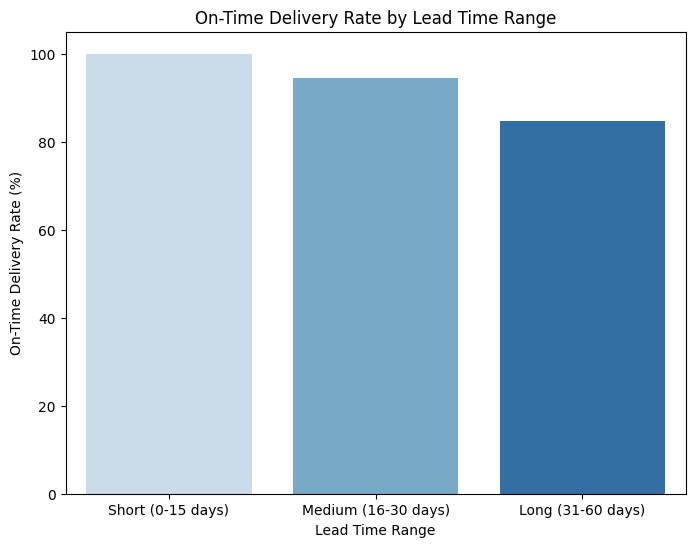

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data after sql.csv")

# Convert OnTimeDelivery (Y/N) into numbers: Y=1, N=0
df["OnTimeDeliveryBinary"] = df["OnTimeDelivery"].map({"Y":1, "N":0})

# Step 1: Create lead time ranges
bins = [0, 15, 30, 60]   # short, medium, long
labels = ["Short (0-15 days)", "Medium (16-30 days)", "Long (31-60 days)"]
df["LeadTimeRange"] = pd.cut(df["LeadTimeDays"], bins=bins, labels=labels, include_lowest=True)

# Step 2: Calculate average on-time delivery rate for each range
range_stats = df.groupby("LeadTimeRange")["OnTimeDeliveryBinary"].mean().reset_index()
range_stats["OnTimeDeliveryRatePct"] = range_stats["OnTimeDeliveryBinary"] * 100

print("On-Time Delivery Rate by Lead Time Range:")
print(range_stats)

# Step 3: Simple bar chart
plt.figure(figsize=(8,6))
sns.barplot(data=range_stats, x="LeadTimeRange", y="OnTimeDeliveryRatePct", palette="Blues")
plt.title("On-Time Delivery Rate by Lead Time Range")
plt.ylabel("On-Time Delivery Rate (%)")
plt.xlabel("Lead Time Range")
plt.show()

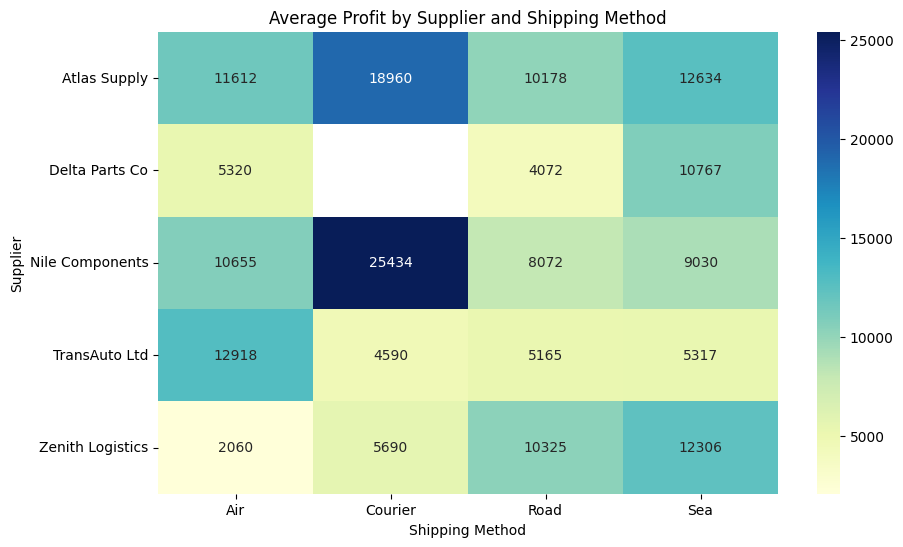

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data after sql.csv")

# Step 1: Group by Supplier and ShippingMethod, calculate average Profit
supplier_shipping = (
    df.groupby(["Supplier", "ShippingMethod"])["Profit"]
      .mean()
      .reset_index()
)

# Step 2: Pivot the table for heatmap
pivot_table = supplier_shipping.pivot(index="Supplier", columns="ShippingMethod", values="Profit")

# Step 3: Create heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Profit by Supplier and Shipping Method")
plt.ylabel("Supplier")
plt.xlabel("Shipping Method")
plt.show()

Top 5 Most Profitable Products with Defect Rates:
  ProductName   Profit  DefectRate
0  Alternator  1048044        0.04
3   Brake Pad   592148        0.05
4   Fuel Pump   530608        0.04
2     Bearing   509876        0.04
1        Axle   452424        0.05


/tmp/ipython-input-1708566391.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="ProductName", y="Profit", palette="Greens")


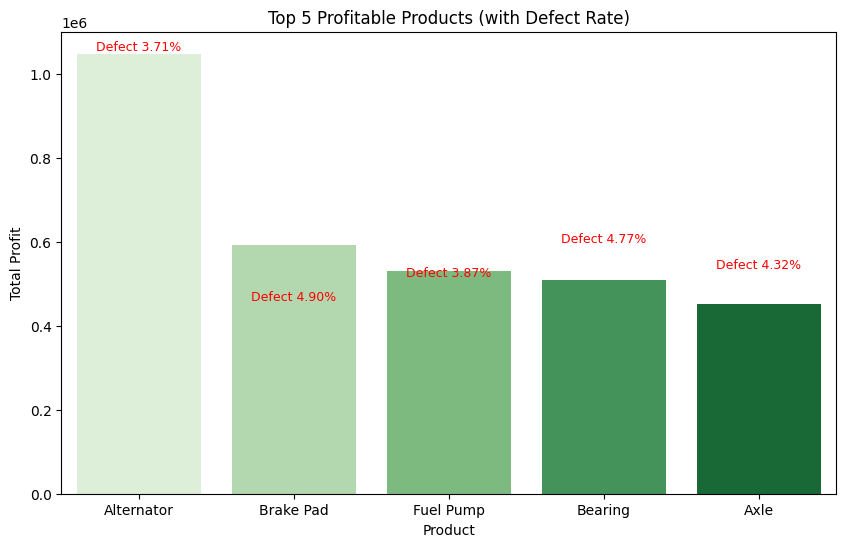

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data after sql.csv")

# Step 1: Group by ProductName, calculate total Profit and average DefectRate
product_stats = (
    df.groupby("ProductName")
      .agg({"Profit":"sum", "DefectRate":"mean"})
      .reset_index()
)

# Step 2: Sort by Profit and take Top 5
top_products = product_stats.sort_values("Profit", ascending=False).head(5)

print("Top 5 Most Profitable Products with Defect Rates:")
print(top_products)

# Step 3: Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x="ProductName", y="Profit", palette="Greens")

# Add defect rate as text labels on bars
for index, row in top_products.iterrows():
    plt.text(index, row["Profit"], f"Defect {row['DefectRate']:.2%}",
             ha='center', va='bottom', fontsize=9, color="red")

plt.title("Top 5 Profitable Products (with Defect Rate)")
plt.ylabel("Total Profit")
plt.xlabel("Product")
plt.show()

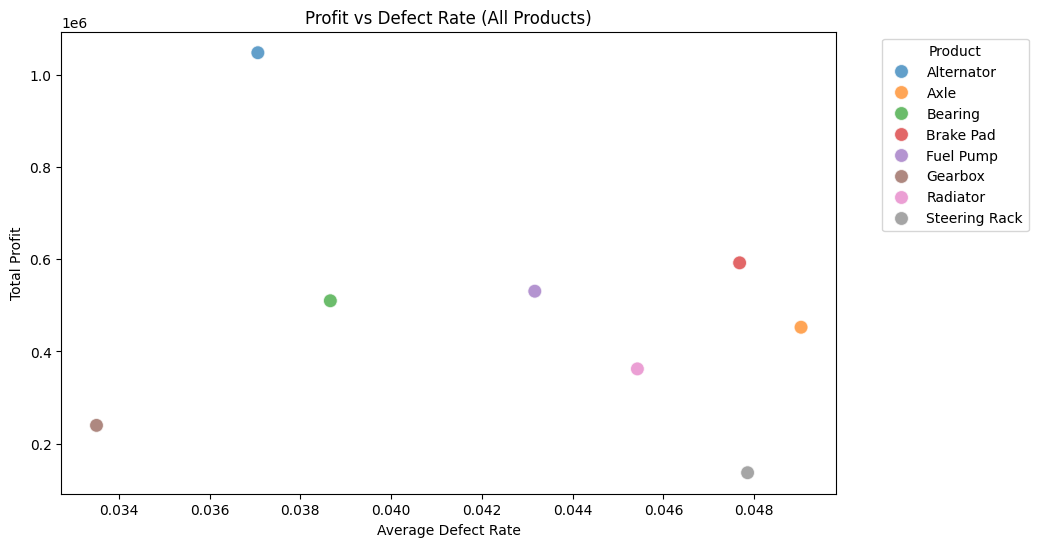

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data after sql.csv")

# Step 1: Group by ProductName, calculate total Profit and average DefectRate
product_stats = (
    df.groupby("ProductName")
      .agg({"Profit":"sum", "DefectRate":"mean"})
      .reset_index()
)

# Step 2: Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=product_stats,
    x="DefectRate", y="Profit",
    hue="ProductName", s=100, alpha=0.7
)

plt.title("Profit vs Defect Rate (All Products)")
plt.xlabel("Average Defect Rate")
plt.ylabel("Total Profit")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Supplier Revenue vs Profit Analysis:
           Supplier      Revenue   Profit  Revenue_to_Profit_Ratio
0      Atlas Supply 4,334,984.82  1089604                     3.98
1    Delta Parts Co 2,202,553.60   548888                     4.01
2   Nile Components 3,762,570.40   881272                     4.27
3     TransAuto Ltd 2,625,850.01   648392                     4.05
4  Zenith Logistics 2,678,276.83   703276                     3.81


/tmp/ipython-input-2029348672.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=supplier_stats, x="Supplier", y="Revenue_to_Profit_Ratio", palette="Blues")


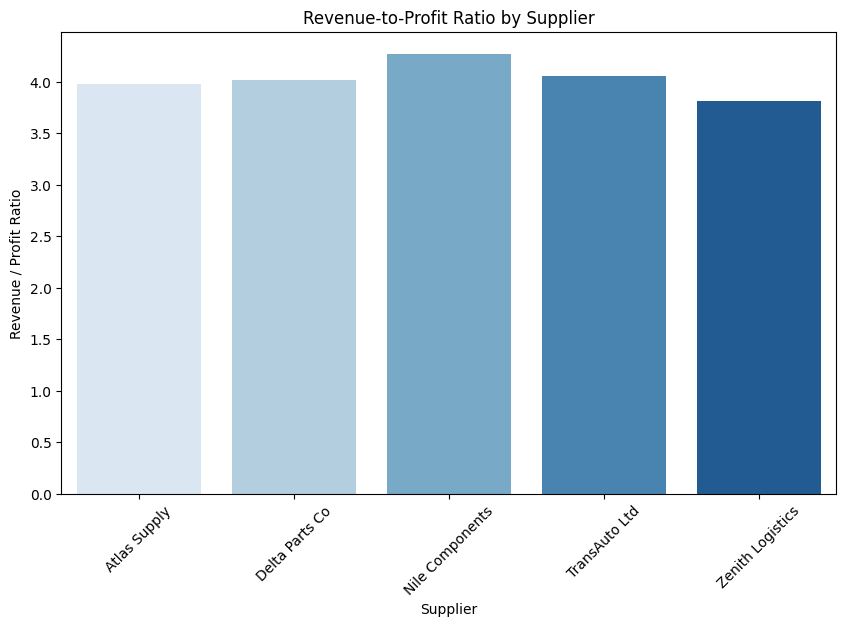

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data after sql.csv")

# Step 1: Group by Supplier, calculate total Revenue and total Profit
supplier_stats = (
    df.groupby("Supplier")
      .agg({"Revenue":"sum", "Profit":"sum"})
      .reset_index()
)

# Step 2: Add Revenue-to-Profit ratio
supplier_stats["Revenue_to_Profit_Ratio"] = supplier_stats["Revenue"] / supplier_stats["Profit"]

print("Supplier Revenue vs Profit Analysis:")
print(supplier_stats)

# Step 3: Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=supplier_stats, x="Supplier", y="Revenue_to_Profit_Ratio", palette="Blues")
plt.title("Revenue-to-Profit Ratio by Supplier")
plt.ylabel("Revenue / Profit Ratio")
plt.xlabel("Supplier")
plt.xticks(rotation=45)
plt.show()

Warehouse Revenue vs Profit Analysis:
   Warehouse      Revenue   Profit  Revenue_to_Profit_Ratio
0   Alex-WH2 5,344,365.66  1324312                     4.04
1  Cairo-WH1 4,185,441.21   939732                     4.45
2   Giza-WH3 6,074,428.78  1607388                     3.78


/tmp/ipython-input-1916755383.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=warehouse_stats, x="Warehouse", y="Revenue_to_Profit_Ratio", palette="Oranges")


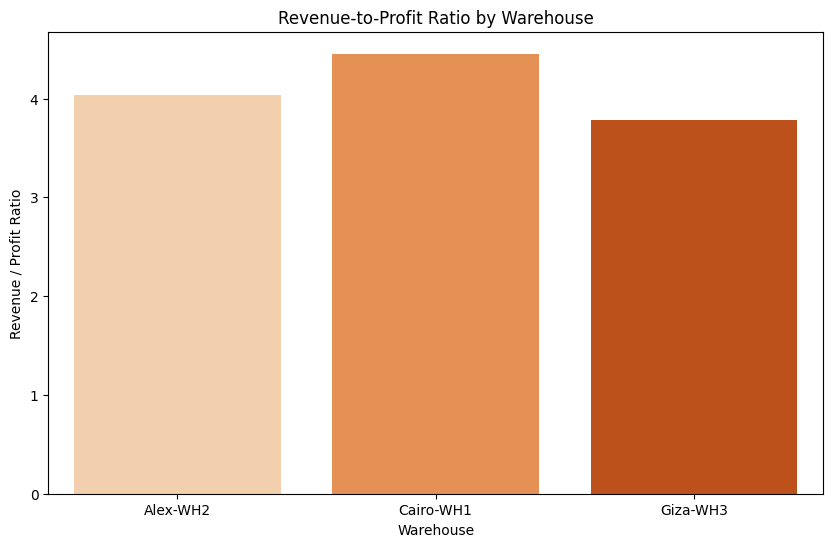

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data after sql.csv")

# Step 1: Group by Warehouse, calculate total Revenue and total Profit
warehouse_stats = (
    df.groupby("Warehouse")
      .agg({"Revenue":"sum", "Profit":"sum"})
      .reset_index()
)

# Step 2: Add Revenue-to-Profit ratio
warehouse_stats["Revenue_to_Profit_Ratio"] = warehouse_stats["Revenue"] / warehouse_stats["Profit"]

print("Warehouse Revenue vs Profit Analysis:")
print(warehouse_stats)

# Step 3: Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=warehouse_stats, x="Warehouse", y="Revenue_to_Profit_Ratio", palette="Oranges")
plt.title("Revenue-to-Profit Ratio by Warehouse")
plt.ylabel("Revenue / Profit Ratio")
plt.xlabel("Warehouse")
plt.show()

Total Quantity by Supplier:
           Supplier  Quantity
0      Atlas Supply     23608
3     TransAuto Ltd     22116
2   Nile Components     20492
4  Zenith Logistics     15784
1    Delta Parts Co     14356


/tmp/ipython-input-103432021.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=supplier_quantity, x="Supplier", y="Quantity", palette="Greens")


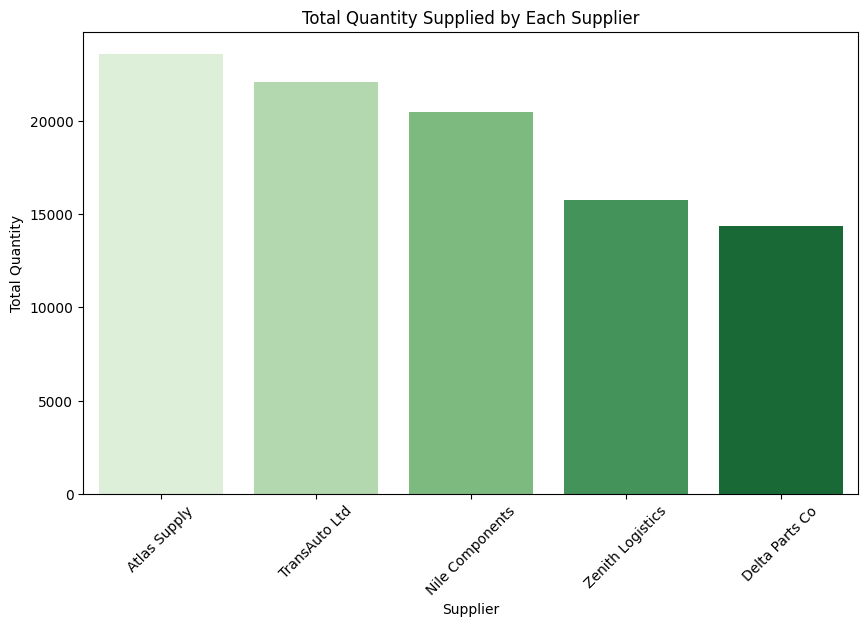

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data after sql.csv")

# Step 1: Group by Supplier, calculate total Quantity
supplier_quantity = (
    df.groupby("Supplier")["Quantity"]
      .sum()
      .reset_index()
      .sort_values("Quantity", ascending=False)
)

print("Total Quantity by Supplier:")
print(supplier_quantity)

# Step 2: Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=supplier_quantity, x="Supplier", y="Quantity", palette="Greens")
plt.title("Total Quantity Supplied by Each Supplier")
plt.ylabel("Total Quantity")
plt.xlabel("Supplier")
plt.xticks(rotation=45)
plt.show()

Total Quantity Shipped From Each Country:
  CountryFrom  Quantity
4      Turkey     20828
5         UAE     19264
3       Italy     18724
1       Egypt     15172
0       China     13140
2     Germany      9228


/tmp/ipython-input-3533684015.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_from_quantity, x="CountryFrom", y="Quantity", palette="viridis")


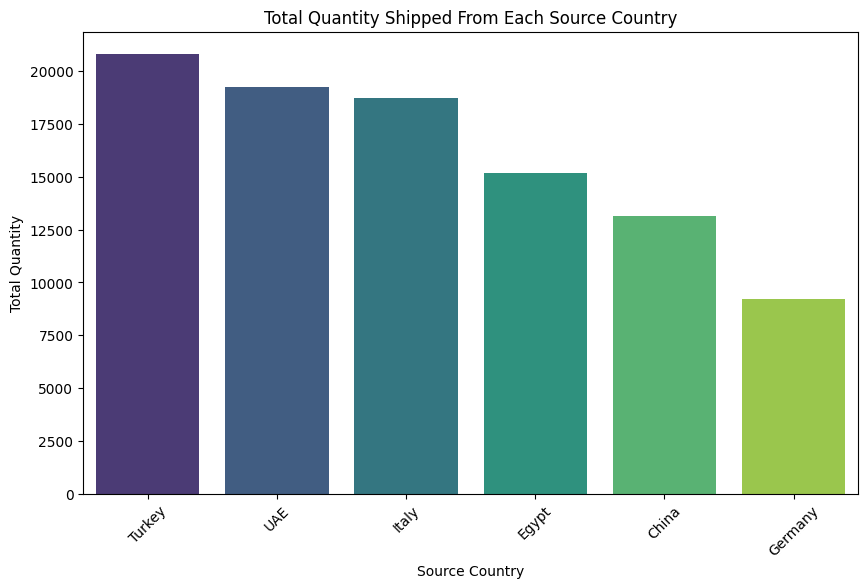

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data after sql.csv")

# Step 1: Group by CountryFrom, calculate total Quantity
country_from_quantity = (
    df.groupby("CountryFrom")["Quantity"]
      .sum()
      .reset_index()
      .sort_values("Quantity", ascending=False)
)

print("Total Quantity Shipped From Each Country:")
print(country_from_quantity)

# Step 2: Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=country_from_quantity, x="CountryFrom", y="Quantity", palette="viridis")
plt.title("Total Quantity Shipped From Each Source Country")
plt.ylabel("Total Quantity")
plt.xlabel("Source Country")
plt.xticks(rotation=45)
plt.show()

Files in /content: ['.config', 'data after sql.csv', '.ipynb_checkpoints', 'sample_data']
✅ File connected successfully!
    OrderID  OrderDate        Supplier       SKU    ProductName  Quantity  \
0  ORD10054 2025-01-02    Atlas Supply  SKU-1032  Steering Rack       147   
1  ORD10085 2025-01-09   TransAuto Ltd  SKU-1016        Bearing       385   
2  ORD10044 2025-01-14    Atlas Supply  SKU-1031      Brake Pad       355   
3  ORD10081 2025-01-15  Delta Parts Co  SKU-1019  Steering Rack        89   
4  ORD10038 2025-01-21   TransAuto Ltd  SKU-1001           Axle       262   

   UnitCost  UnitPrice CountryFrom CountryTo  ... LeadTimeDays  \
0    201.80     289.50       Italy     Egypt  ...           30   
1     76.80     113.60       Italy     Egypt  ...           19   
2     83.20     101.30       Italy     Egypt  ...           10   
3    237.90     293.20       Egypt     Egypt  ...           30   
4     22.00      27.40       Italy     Egypt  ...           45   

   TransitTimeDays 

/tmp/ipython-input-3942973311.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shipping_stats, x="ShippingMethod", y="DefectRate", palette="Reds")


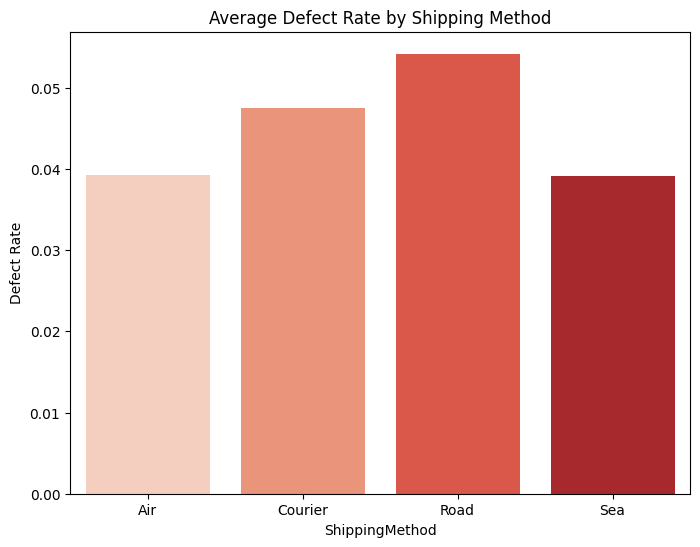

/tmp/ipython-input-3942973311.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shipping_stats, x="ShippingMethod", y="OnTimeDeliveryRatePct", palette="Blues")


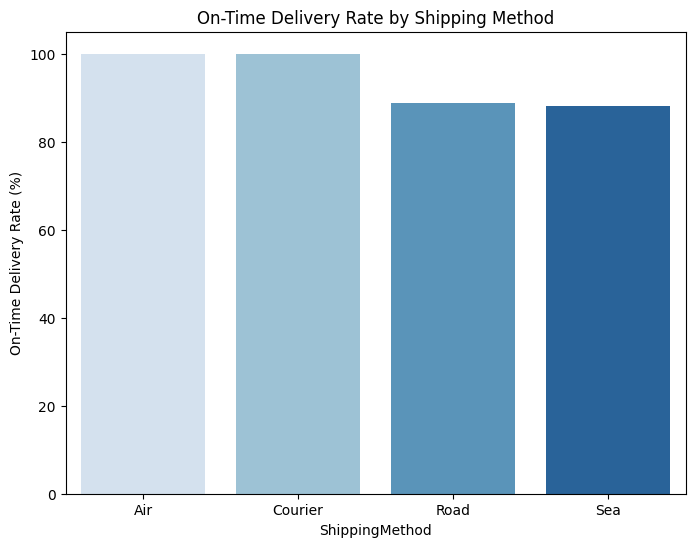

/tmp/ipython-input-3942973311.py:123: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("LeadTimeRange")["OnTimeDeliveryBinary"]
/tmp/ipython-input-3942973311.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=range_stats, x="LeadTimeRange", y="OnTimeDeliveryRatePct", palette="Blues")


On-Time Delivery Rate by Lead Time Range:
         LeadTimeRange  OnTimeDeliveryBinary  OnTimeDeliveryRatePct
0    Short (0-15 days)                  1.00                 100.00
1  Medium (16-30 days)                  0.95                  94.59
2    Long (31-60 days)                  0.85                  84.78


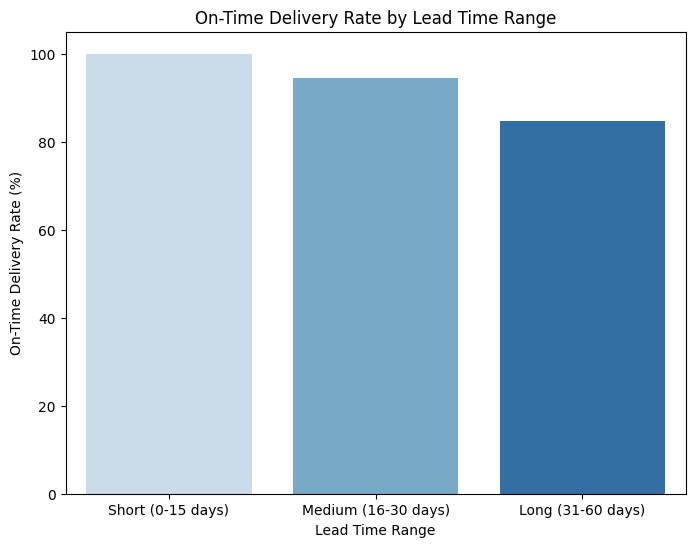

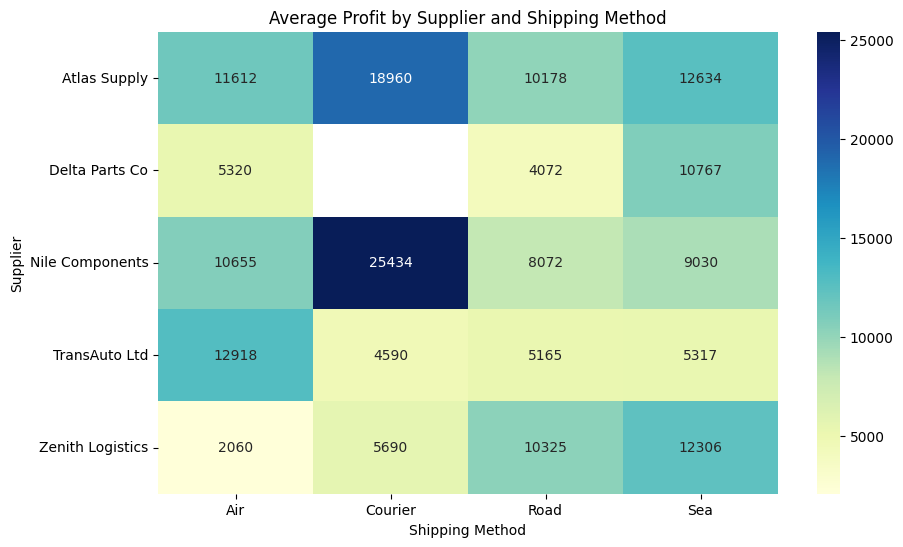

Top 5 Most Profitable Products with Defect Rates:
  ProductName   Profit  DefectRate
0  Alternator  1048044        0.04
3   Brake Pad   592148        0.05
4   Fuel Pump   530608        0.04
2     Bearing   509876        0.04
1        Axle   452424        0.05


/tmp/ipython-input-3942973311.py:168: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="ProductName", y="Profit", palette="Greens")


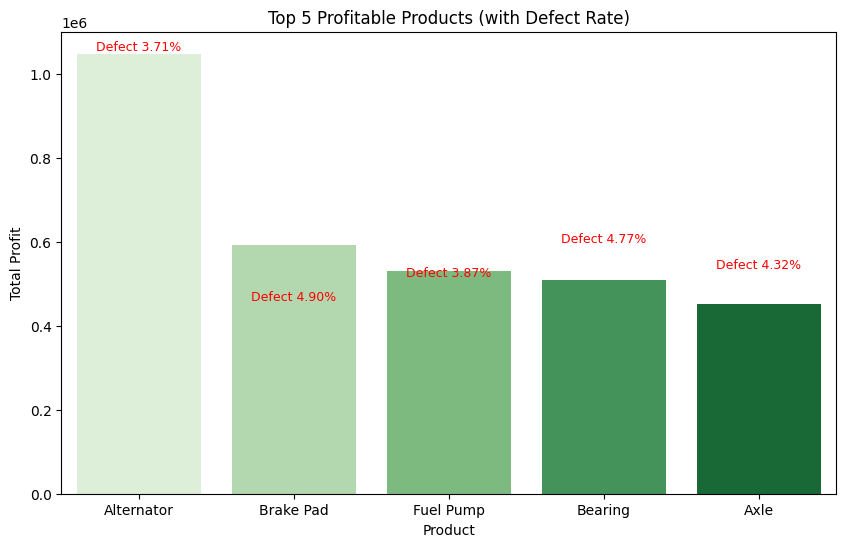

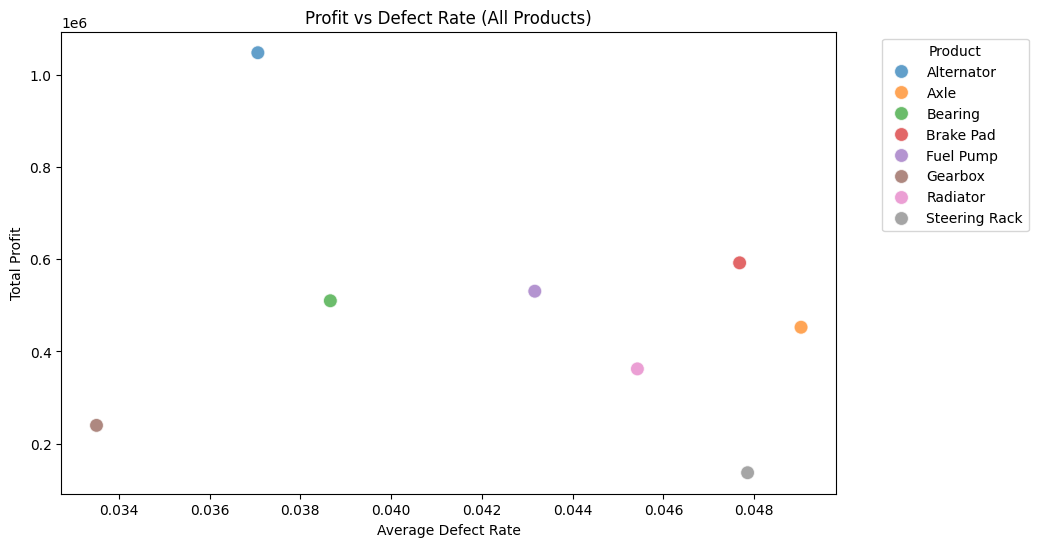

Supplier Revenue vs Profit Analysis:
           Supplier      Revenue   Profit  Revenue_to_Profit_Ratio
0      Atlas Supply 4,334,984.82  1089604                     3.98
1    Delta Parts Co 2,202,553.60   548888                     4.01
2   Nile Components 3,762,570.40   881272                     4.27
3     TransAuto Ltd 2,625,850.01   648392                     4.05
4  Zenith Logistics 2,678,276.83   703276                     3.81


/tmp/ipython-input-3942973311.py:208: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stats, x=col, y="Revenue_to_Profit_Ratio", palette=palette)


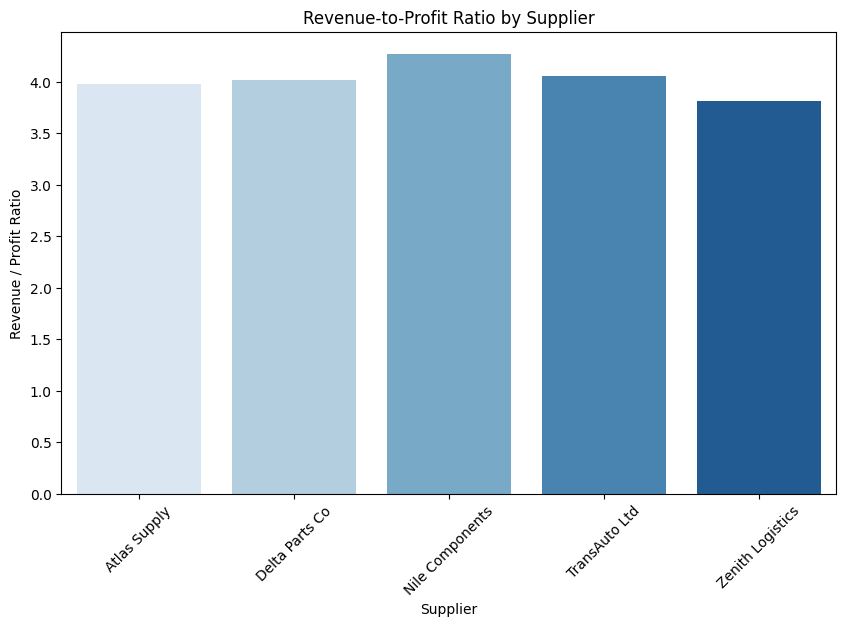

Warehouse Revenue vs Profit Analysis:
   Warehouse      Revenue   Profit  Revenue_to_Profit_Ratio
0   Alex-WH2 5,344,365.66  1324312                     4.04
1  Cairo-WH1 4,185,441.21   939732                     4.45
2   Giza-WH3 6,074,428.78  1607388                     3.78


/tmp/ipython-input-3942973311.py:208: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stats, x=col, y="Revenue_to_Profit_Ratio", palette=palette)


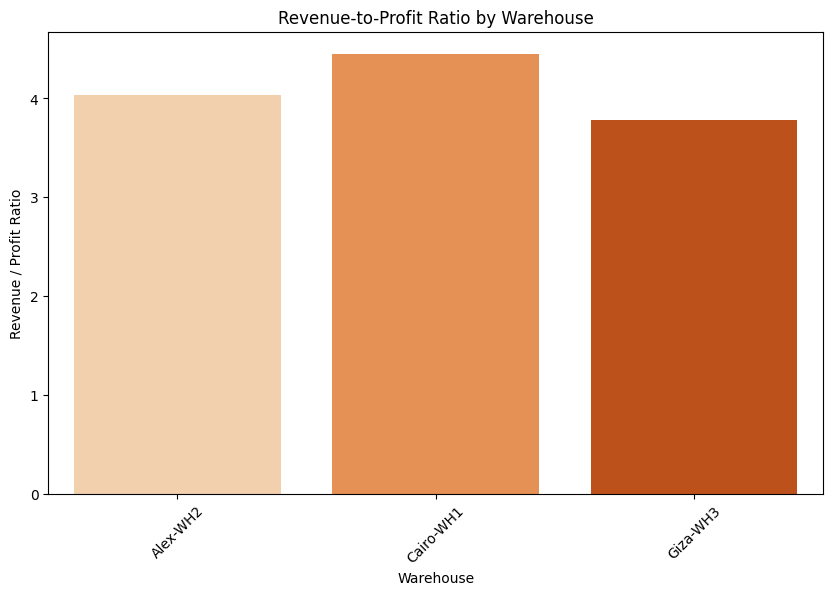

Total Quantity by Supplier:
           Supplier  Quantity
0      Atlas Supply     23608
3     TransAuto Ltd     22116
2   Nile Components     20492
4  Zenith Logistics     15784
1    Delta Parts Co     14356


/tmp/ipython-input-3942973311.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=qty, x=col, y="Quantity", palette=palette)


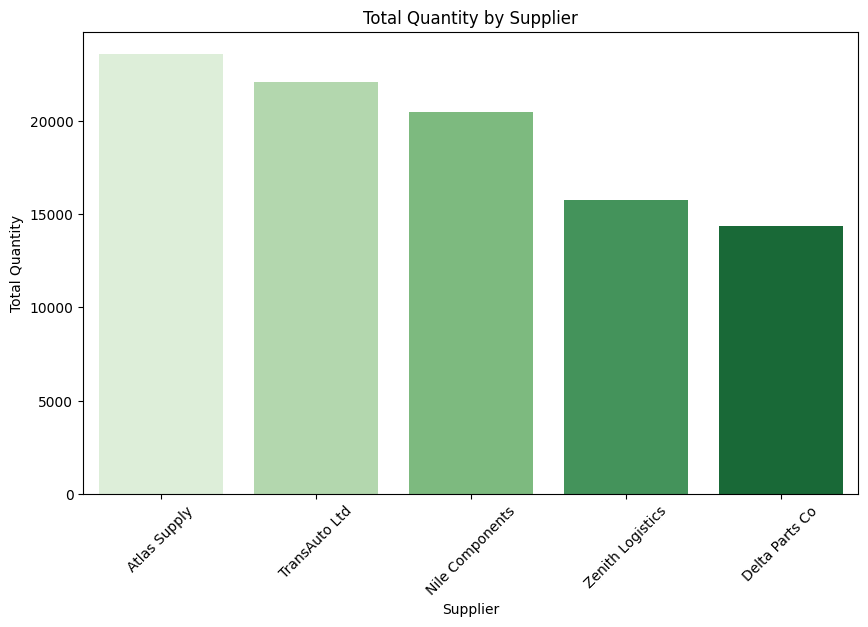

Total Quantity Shipped From Each Country:
  CountryFrom  Quantity
4      Turkey     20828
5         UAE     19264
3       Italy     18724
1       Egypt     15172
0       China     13140
2     Germany      9228


/tmp/ipython-input-3942973311.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=qty, x=col, y="Quantity", palette=palette)


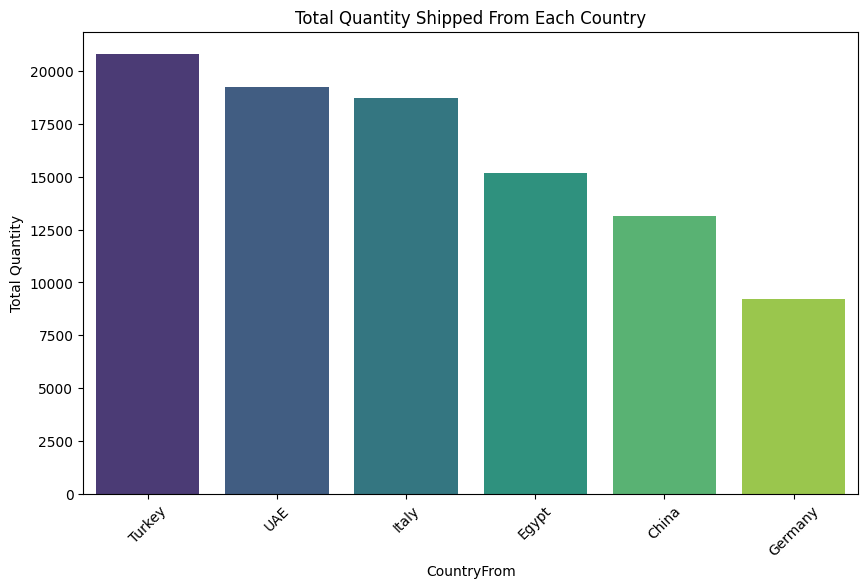


📊 Quantity, Revenue, and Profit by Source Country:


/tmp/ipython-input-3942973311.py:248: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ].applymap(lambda x: f"{x:,.0f}")



Country From Total Quantity Total Revenue Total Profit
         UAE         19,264     3,502,449      929,692
       Italy         18,724     3,174,027      691,312
       Egypt         15,172     2,955,487      751,552
      Turkey         20,828     2,917,981      693,928
       China         13,140     1,813,454      460,828
     Germany          9,228     1,240,837      344,120


In [57]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------- Load & Clean --------------------
print("Files in /content:", os.listdir("/content"))

df = pd.read_csv("/content/data after sql.csv", parse_dates=["OrderDate"])

print("✅ File connected successfully!")
print(df.head())

df.columns = df.columns.str.strip()
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
df["OnTimeDelivery"] = df["OnTimeDelivery"].str.upper().str.strip()
df["OnTimeDeliveryBinary"] = df["OnTimeDelivery"].map({"Y": 1, "N": 0})
df["LateFlag"] = df["OnTimeDelivery"].map({"Y": 0, "N": 1})

df.info()
print(df.columns)

# -------------------- Profit & Cost Analysis --------------------
df["Profit_from_units"] = (df["UnitPrice"] - df["UnitCost"]) * df["Quantity"]
df["Profit_diff"] = df["Profit"] - df["Profit_from_units"]

df["UnitCost_5pct_down"] = df["UnitCost"] * 0.95
df["Profit_5pct_down"] = (df["UnitPrice"] - df["UnitCost_5pct_down"]) * df["Quantity"]

supplier_profit = (
    df.groupby("Supplier", as_index=False)
      .agg(
          Profit_Before=("Profit", "sum"),
          Profit_After=("Profit_5pct_down", "sum")
      )
)

supplier_profit["Profit_Change_Pct"] = (
    (supplier_profit["Profit_After"] - supplier_profit["Profit_Before"])
    / supplier_profit["Profit_Before"] * 100
).round(2).astype(str) + "%"

pd.options.display.float_format = '{:,.2f}'.format
supplier_profit

# -------------------- Lead Time Scenario --------------------
df["LeadTime_5pct_down"] = df["LeadTimeDays"] * 0.95
df["IdleTime_5pct_down"] = df["IdleTime"] * 0.95

idle_cost_per_day = df["TotalCost"].mean() / df["LeadTimeDays"].mean()

df["TotalCost_5pct_down_LT"] = (
    df["TotalCost"] - (df["IdleTime"] - df["IdleTime_5pct_down"]) * idle_cost_per_day
)

df["Profit_5pct_down_LT"] = df["Revenue"] - df["TotalCost_5pct_down_LT"]
df["Profit_Change_LT"] = df["Profit_5pct_down_LT"] - df["Profit"]

df[["Profit", "Profit_5pct_down_LT", "Profit_Change_LT"]].head()

# -------------------- Shipping Financials --------------------
method_financials = (
    df.groupby("ShippingMethod", as_index=False)
      .agg(
          Total_Revenue=("Revenue", "sum"),
          Total_Cost=("TotalCost", "sum"),
          Total_Profit=("Profit", "sum"),
          Total_Volume=("Quantity", "sum")
      )
      .sort_values("Total_Revenue", ascending=False)
)

method_financials
method_financials[['ShippingMethod', 'Total_Revenue', 'Total_Cost']]

# -------------------- Defects --------------------
df["Defect_Profit_Loss"] = df["Profit"] * df["DefectRate"]

# -------------------- Revenue Share --------------------
total_revenue = df["Revenue"].sum()

revenue_share = (
    df.groupby("ProductName", as_index=False)
      .agg({"Revenue": "sum", "Profit": "sum"})
)

revenue_share["RevenuePct"] = (revenue_share["Revenue"] / total_revenue * 100).round(2)
highest_revenue_products = revenue_share.sort_values("RevenuePct", ascending=False)

print(highest_revenue_products)

# -------------------- Shipping Risk Analysis --------------------
shipping_stats = (
    df.groupby("ShippingMethod")
      .agg({"DefectRate":"mean", "OnTimeDeliveryBinary":"mean"})
      .reset_index()
)

shipping_stats["OnTimeDeliveryRatePct"] = shipping_stats["OnTimeDeliveryBinary"] * 100

print("Shipping Method Risk Analysis:")
print(shipping_stats)

plt.figure(figsize=(8,6))
sns.barplot(data=shipping_stats, x="ShippingMethod", y="DefectRate", palette="Reds")
plt.title("Average Defect Rate by Shipping Method")
plt.ylabel("Defect Rate")
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(data=shipping_stats, x="ShippingMethod", y="OnTimeDeliveryRatePct", palette="Blues")
plt.title("On-Time Delivery Rate by Shipping Method")
plt.ylabel("On-Time Delivery Rate (%)")
plt.show()

# -------------------- Lead Time Ranges --------------------
bins = [0, 15, 30, 60]
labels = ["Short (0-15 days)", "Medium (16-30 days)", "Long (31-60 days)"]

df["LeadTimeRange"] = pd.cut(df["LeadTimeDays"], bins=bins, labels=labels, include_lowest=True)

range_stats = (
    df.groupby("LeadTimeRange")["OnTimeDeliveryBinary"]
      .mean()
      .reset_index()
)

range_stats["OnTimeDeliveryRatePct"] = range_stats["OnTimeDeliveryBinary"] * 100

print("On-Time Delivery Rate by Lead Time Range:")
print(range_stats)

plt.figure(figsize=(8,6))
sns.barplot(data=range_stats, x="LeadTimeRange", y="OnTimeDeliveryRatePct", palette="Blues")
plt.title("On-Time Delivery Rate by Lead Time Range")
plt.ylabel("On-Time Delivery Rate (%)")
plt.xlabel("Lead Time Range")
plt.show()

# -------------------- Supplier × Shipping Heatmap --------------------
pivot_table = (
    df.groupby(["Supplier", "ShippingMethod"])["Profit"]
      .mean()
      .reset_index()
      .pivot(index="Supplier", columns="ShippingMethod", values="Profit")
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Profit by Supplier and Shipping Method")
plt.ylabel("Supplier")
plt.xlabel("Shipping Method")
plt.show()

# -------------------- Product Analysis --------------------
product_stats = (
    df.groupby("ProductName")
      .agg({"Profit":"sum", "DefectRate":"mean"})
      .reset_index()
)

top_products = product_stats.sort_values("Profit", ascending=False).head(5)

print("Top 5 Most Profitable Products with Defect Rates:")
print(top_products)

plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x="ProductName", y="Profit", palette="Greens")

for i, r in top_products.iterrows():
    plt.text(i, r["Profit"], f"Defect {r['DefectRate']:.2%}",
             ha='center', va='bottom', fontsize=9, color="red")

plt.title("Top 5 Profitable Products (with Defect Rate)")
plt.ylabel("Total Profit")
plt.xlabel("Product")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=product_stats,
    x="DefectRate", y="Profit",
    hue="ProductName", s=100, alpha=0.7
)

plt.title("Profit vs Defect Rate (All Products)")
plt.xlabel("Average Defect Rate")
plt.ylabel("Total Profit")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# -------------------- Supplier & Warehouse Ratios --------------------
for col, title, palette in [
    ("Supplier", "Supplier Revenue vs Profit Analysis:", "Blues"),
    ("Warehouse", "Warehouse Revenue vs Profit Analysis:", "Oranges")
]:
    stats = (
        df.groupby(col)
          .agg({"Revenue":"sum", "Profit":"sum"})
          .reset_index()
    )
    stats["Revenue_to_Profit_Ratio"] = stats["Revenue"] / stats["Profit"]

    print(title)
    print(stats)

    plt.figure(figsize=(10,6))
    sns.barplot(data=stats, x=col, y="Revenue_to_Profit_Ratio", palette=palette)
    plt.title(f"Revenue-to-Profit Ratio by {col}")
    plt.ylabel("Revenue / Profit Ratio")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

# -------------------- Quantity Analysis --------------------
for col, title, palette in [
    ("Supplier", "Total Quantity by Supplier:", "Greens"),
    ("CountryFrom", "Total Quantity Shipped From Each Country:", "viridis")
]:
    qty = (
        df.groupby(col)["Quantity"]
          .sum()
          .reset_index()
          .sort_values("Quantity", ascending=False)
    )

    print(title)
    print(qty)

    plt.figure(figsize=(10,6))
    sns.barplot(data=qty, x=col, y="Quantity", palette=palette)
    plt.title(title.replace(":", ""))
    plt.ylabel("Total Quantity")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

# -------------------- Country Summary Table --------------------
country_from_stats = (
    df.groupby("CountryFrom")
      .agg({"Quantity":"sum", "Revenue":"sum", "Profit":"sum"})
      .reset_index()
      .sort_values("Revenue", ascending=False)
)

country_from_stats[["Quantity","Revenue","Profit"]] = country_from_stats[
    ["Quantity","Revenue","Profit"]
].applymap(lambda x: f"{x:,.0f}")

country_from_stats.columns = ["Country From", "Total Quantity", "Total Revenue", "Total Profit"]

print("\n📊 Quantity, Revenue, and Profit by Source Country:\n")
print(country_from_stats.to_string(index=False))


In [58]:
rows, cols = df.shape
print("Rows:", rows)
print("Columns:", cols)


Rows: 400
Columns: 34


In [59]:
rows, cols = df.shape
print("Rows:", rows)
print("Columns:", cols)



Rows: 400
Columns: 34


In [60]:
df.to_csv("final_supply_chain_dataset.csv", index=False)


In [61]:
from google.colab import files
files.download("final_supply_chain_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>